In [42]:
import sys
import random as rnd
from prisonerClasses import Player
from pylab import *
import operator

global printORnot
printORnot = False
global randomness
randomness = 0

def Payoff(player1_choice, player2_choice):
    
    ###############################################################################################################
    ### FUNCTION DESIGNED TO PLAY PRISONERS DILEMMA https://en.wikipedia.org/wiki/Prisoner%27s_dilemma          ###
    ### THIS ENTIRE FUNCTION IS DESIGNED TO RUN BEHIND THE SCENES; FANCY CODE IS ALLOWED AS LONG AS PREMISES OF ###
    ### PRISONERS DILEMMA ARE CONSERVED.                                                                        ###
    ###############################################################################################################
    
    import time
    #time.sleep(0.5)
    
    ### Infers conceptual choice of players and checks for errors                                               ###
    ### 0 is cooperation, 1 is defection ###
    
    if printORnot == True:
        if player1_choice == 0:
            print ("Player 1 cooperates!")
        elif player1_choice == 1:
            print("Player 1 defects!")
        else:
            print("Invalid value provided for Player 1")
            return

        if player2_choice == 0:
            print ("Player 2 cooperates!")
        elif player2_choice == 1:
            print("Player 2 defects!")
        else:
            print("Invalid value provided for Player 2")
            return

    ### Establishes payoff matrix ###
    #payoffs = [[[-1, -1], [0, -3]],[[-3, 0], [-2, -2]]] ### ALTERNATIVE PAYOFF MATRIX USING NEGATIVES / 10
    
    payoffs = np.asarray([[[20, 20], [30, 0]],[[0, 30], [10, 10]]])  ### ALTERNATIVE PAYOFF MATRIX USING POSITIVES
    
    ### Creates and assigns score to new variable for each player ###
    player1_score = payoffs[player1_choice][player2_choice][1]
    player2_score = payoffs[player1_choice][player2_choice][0]
    
    ### Prints score for each player for the current round ###
    if printORnot == True:
        print("Player 1 score:", player1_score)
        print("Player 2 score:", player2_score)
        print("")

    ### Returns both the choices of each player and the score of each player. The choice is returned in order to make
    ### the design of a responsive algorithm easier, removing the need to infer the choice from received score
    return (player1_score, player2_score)

def GamePrinter(timesteps, allscores, list_of_players):
    colors = ['b-', 'g-', 'r-', 'c-', 'm-', 'y-', 'k-']
    markers = [".", ",", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d", "|", "_",]
    i = 0
    for key in allscores:
        color = colors[i%len(colors)]
        color += markers[i%len(markers)]
        plt.plot(timesteps, allscores[key], color, label = key)
        i += 1
    xticks(timesteps)
    yticks(np.arange(0,30,2))
    legend()
    #savefig('timeline.png', bbox_inches='tight', dpi=300)
    plt.show()
    
    BarPlotter(allscores)
    
    return
    
    
    
def BarPlotter(b_allscores):
    
    names = []
    points_this_round = []
    
    for key in b_allscores:
        if type(b_allscores[key]) == np.ndarray:
            names.append(key)
            points_this_round.append(b_allscores[key][-1])
        elif type(b_allscores[key]) == int or type(b_allscores[key]) == np.float64:
            names.append(key)
            points_this_round.append(b_allscores[key])
    
    y_pos = np.arange(len(names))
 
    plt.bar(y_pos, points_this_round, color='blue')
    
    plt.xticks(y_pos, names, rotation=90)
    plt.ylabel('Points')
    plt.title('Strategy')
    
    #savefig('barplot.png', bbox_inches='tight', dpi=300)
    plt.show()
    
    return

    
def Elimination(f_scores, f_howmanyplays, f_allplayers):
    
    #print("Allplayers before elimination: {}".format(f_allplayers))
    sorted_d = sorted(f_scores.items(), key=operator.itemgetter(1)) #Returns list of tuples [("name", score),...]
    
    p_generation = []

    for element in sorted_d:
        if f_howmanyplays[element[0]] == 0:
            continue
        else:
            #print(element[1])
            for i in range(f_allplayers.count(element[0])):
                p_generation.append(element[0])
        
    
    # Write code that tests the head of the parent generation to see if the lowest scoring strategies are in fact equal
    # and randomly removes one of them. This should prevent fixation due to the random position or early wins of a strategy
    # This list should contain all the lowest ranking strategies with the same scores. Ideally, only one name should
    # be on this list in the case of a single strategy being the weakest.
    
    kill_list = [p_generation[0]]
    #print("Parent generation: {}".format(p_generation))
    
    for i in range(len(p_generation)-1):
        element = p_generation[i]
        nextinline = p_generation[i+1]
        
        if f_scores[element] == f_scores[nextinline]:
            kill_list.append(nextinline)
        elif f_scores[element] < f_scores[nextinline]:
            break

    #print("Kill list: {}".format(kill_list))
    assassins_target = rnd.choice(kill_list)
    #print("Killing: \t{}".format(assassins_target))
    #print("Winner: \t{}".format(p_generation[-1]))
    
    f_allplayers = list(p_generation)
    f_allplayers.remove(assassins_target)
    f_allplayers.extend(p_generation[-1:])
    
    #print("Allplayers after elimination: {}".format(f_allplayers))
    
    return f_allplayers

def Indexer(choices):
    i_timesteps = np.arange(1,(len(choices)+1),1)
    coop_index = zeros(len(choices))
    i = 0

    for game in choices:
        #print("Length of game: {}".format(len(game)))
        #print("Sum of game: {}".format(sum(game)))
        coop_index[i] = 1-((sum(game)/len(game)))
        i += 1
        
    plt.plot(i_timesteps, coop_index, label = "Cooperation index")
    xticks(i_timesteps)
    yticks(np.arange(0,1,0.1))
    legend()
    savefig('coopindex.png', bbox_inches='tight', dpi=300)
    plt.show()



In [ ]:
scores = {"cooperator": 0, "defector": 0, "randomy": 0, "opposite": 0, "mefirst": 0, "happyflop": 0, "angryflop": 0, "grudgy": 0, "tit4tat": 0}

In [ ]:
player1_total = 0
player2_total = 0

name1 = str(input("Input strategy of player 1: "))
name1 = name1.lower()
name2 = str(input("Input strategy of player 2: "))
name2 = name2.lower()

if name1 not in scores or name2 not in scores:
    sys.exit("Unrecognized players %s, %s check scores dictionary for names." % (name1, name2))

player1 = Player(name1)
player2 = Player(name2)

all_choices = [[],[]]

player1_prev_choice = None
player2_prev_choice = None

for i in range(20):
    player1_send = player1.Play(all_choices, 0, i)
    player2_send = player2.Play(all_choices, 1, i)
    
    if player1_send == 3:
        print("Player 1 reported an error")
        continue
    if player2_send == 3:
        print("Player 2 reported an error")
        continue
    
    player1_miscomm = rnd.randint(0,99)
    player2_miscomm = rnd.randint(0,99)
        
    if player1_miscomm < randomness:
        if player1_send == 1:
            player1_send = 0
        elif player1_send == 0:
            player1_send = 1
                    
    if player2_miscomm < randomness:
        if player2_send == 1:
            player2_send = 0
        elif player2_send == 0:
            player2_send = 1
        
    player1_rec, player2_rec = Payoff(player1_send, player2_send)
    
    all_choices[0].append(player1_send)
    all_choices[1].append(player2_send)
    
    player1_total += player1_rec
    player2_total += player2_rec
    
    
print("Player 1 %s total %i\nPlayer 2 %s total %i" % (name1.capitalize(), player1_total, name2.capitalize(), player2_total))
print("All games: %s" % all_choices)
scores[name1] += player1_total
scores[name2] += player2_total

New round!
Round 1 with the current strategies: ['cooperator', 'defector', 'randomy', 'opposite', 'mefirst', 'happyflop', 'angryflop', 'grudgy', 'tit4tat', 'tit42tat', 'trapper', 'smarttrapper']
Strat: cooperator   	Avg pts: 11.27
Strat: defector   	Avg pts: 17.64
Strat: randomy   	Avg pts: 13.30
Strat: opposite   	Avg pts: 12.52
Strat: mefirst   	Avg pts: 14.18
Strat: happyflop   	Avg pts: 13.00
Strat: angryflop   	Avg pts: 12.86
Strat: grudgy   	Avg pts: 17.45
Strat: tit4tat   	Avg pts: 15.07
Strat: tit42tat   	Avg pts: 16.50
Strat: trapper   	Avg pts: 14.89
Strat: smarttrapper   	Avg pts: 15.82


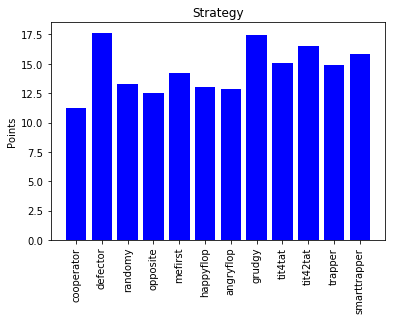

New round!
Round 2 with the current strategies: ['opposite', 'angryflop', 'happyflop', 'randomy', 'mefirst', 'trapper', 'tit4tat', 'smarttrapper', 'tit42tat', 'grudgy', 'defector', 'defector']
Strat: opposite   	Avg pts: 10.25
Strat: angryflop   	Avg pts: 10.73
Strat: happyflop   	Avg pts: 11.05
Strat: randomy   	Avg pts: 11.05
Strat: mefirst   	Avg pts: 12.82
Strat: trapper   	Avg pts: 13.84
Strat: tit4tat   	Avg pts: 14.09
Strat: smarttrapper   	Avg pts: 14.57
Strat: tit42tat   	Avg pts: 15.52
Strat: grudgy   	Avg pts: 16.68
Strat: defector   	Avg pts: 15.89
Strat: defector   	Avg pts: 15.89


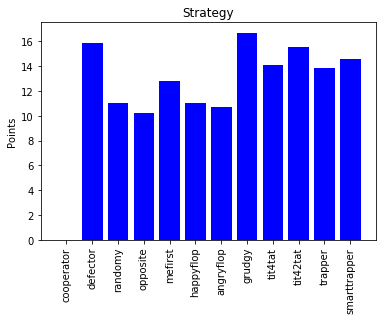

New round!
Round 3 with the current strategies: ['angryflop', 'randomy', 'happyflop', 'mefirst', 'trapper', 'tit4tat', 'smarttrapper', 'tit42tat', 'defector', 'defector', 'grudgy', 'grudgy']
Strat: angryflop   	Avg pts: 9.77
Strat: randomy   	Avg pts: 10.95
Strat: happyflop   	Avg pts: 10.00
Strat: mefirst   	Avg pts: 12.68
Strat: trapper   	Avg pts: 13.05
Strat: tit4tat   	Avg pts: 14.61
Strat: smarttrapper   	Avg pts: 13.77
Strat: tit42tat   	Avg pts: 15.57
Strat: defector   	Avg pts: 14.09
Strat: defector   	Avg pts: 14.09
Strat: grudgy   	Avg pts: 15.88
Strat: grudgy   	Avg pts: 15.88


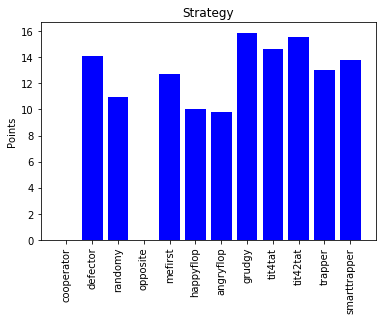

New round!
Round 4 with the current strategies: ['happyflop', 'randomy', 'mefirst', 'trapper', 'smarttrapper', 'defector', 'defector', 'tit4tat', 'tit42tat', 'grudgy', 'grudgy', 'grudgy']
Strat: happyflop   	Avg pts: 9.64
Strat: randomy   	Avg pts: 9.75
Strat: mefirst   	Avg pts: 12.86
Strat: trapper   	Avg pts: 12.61
Strat: smarttrapper   	Avg pts: 13.25
Strat: defector   	Avg pts: 13.55
Strat: defector   	Avg pts: 13.55
Strat: tit4tat   	Avg pts: 15.09
Strat: tit42tat   	Avg pts: 15.75
Strat: grudgy   	Avg pts: 15.77
Strat: grudgy   	Avg pts: 15.77
Strat: grudgy   	Avg pts: 15.77


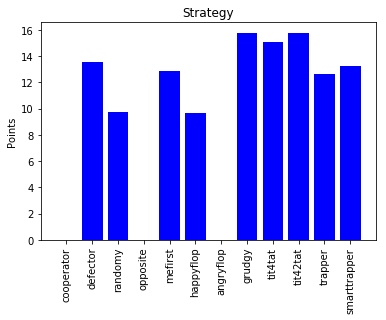

New round!
Round 5 with the current strategies: ['randomy', 'trapper', 'mefirst', 'smarttrapper', 'defector', 'defector', 'tit4tat', 'tit42tat', 'grudgy', 'grudgy', 'grudgy', 'grudgy']
Strat: randomy   	Avg pts: 9.11
Strat: trapper   	Avg pts: 12.25
Strat: mefirst   	Avg pts: 12.64
Strat: smarttrapper   	Avg pts: 13.00
Strat: defector   	Avg pts: 12.45
Strat: defector   	Avg pts: 12.45
Strat: tit4tat   	Avg pts: 15.41
Strat: tit42tat   	Avg pts: 15.82
Strat: grudgy   	Avg pts: 15.98
Strat: grudgy   	Avg pts: 15.98
Strat: grudgy   	Avg pts: 15.98
Strat: grudgy   	Avg pts: 15.98


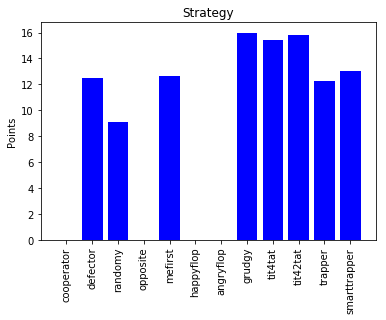

New round!
Round 6 with the current strategies: ['trapper', 'defector', 'defector', 'mefirst', 'smarttrapper', 'tit4tat', 'tit42tat', 'grudgy', 'grudgy', 'grudgy', 'grudgy', 'grudgy']
Strat: trapper   	Avg pts: 11.98
Strat: defector   	Avg pts: 11.73
Strat: defector   	Avg pts: 11.73
Strat: mefirst   	Avg pts: 12.77
Strat: smarttrapper   	Avg pts: 12.34
Strat: tit4tat   	Avg pts: 16.02
Strat: tit42tat   	Avg pts: 16.07
Strat: grudgy   	Avg pts: 16.07
Strat: grudgy   	Avg pts: 16.07
Strat: grudgy   	Avg pts: 16.07
Strat: grudgy   	Avg pts: 16.07
Strat: grudgy   	Avg pts: 16.07


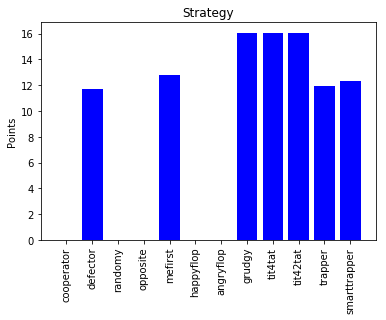

New round!
Round 7 with the current strategies: ['defector', 'trapper', 'smarttrapper', 'mefirst', 'tit4tat', 'grudgy', 'grudgy', 'grudgy', 'grudgy', 'grudgy', 'tit42tat', 'tit42tat']
Strat: defector   	Avg pts: 11.82
Strat: trapper   	Avg pts: 12.20
Strat: smarttrapper   	Avg pts: 12.61
Strat: mefirst   	Avg pts: 13.73
Strat: tit4tat   	Avg pts: 16.98
Strat: grudgy   	Avg pts: 17.02
Strat: grudgy   	Avg pts: 17.02
Strat: grudgy   	Avg pts: 17.02
Strat: grudgy   	Avg pts: 17.02
Strat: grudgy   	Avg pts: 17.02
Strat: tit42tat   	Avg pts: 17.02
Strat: tit42tat   	Avg pts: 17.02


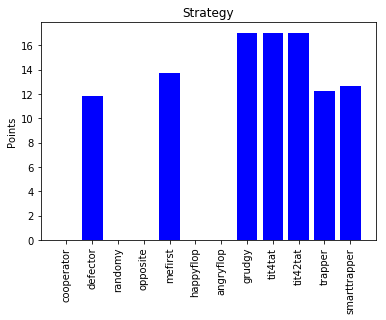

New round!
Round 8 with the current strategies: ['trapper', 'smarttrapper', 'mefirst', 'tit4tat', 'grudgy', 'grudgy', 'grudgy', 'grudgy', 'grudgy', 'tit42tat', 'tit42tat', 'tit42tat']
Strat: trapper   	Avg pts: 12.43
Strat: smarttrapper   	Avg pts: 12.89
Strat: mefirst   	Avg pts: 14.68
Strat: tit4tat   	Avg pts: 17.93
Strat: grudgy   	Avg pts: 17.98
Strat: grudgy   	Avg pts: 17.98
Strat: grudgy   	Avg pts: 17.98
Strat: grudgy   	Avg pts: 17.98
Strat: grudgy   	Avg pts: 17.98
Strat: tit42tat   	Avg pts: 17.98
Strat: tit42tat   	Avg pts: 17.98
Strat: tit42tat   	Avg pts: 17.98


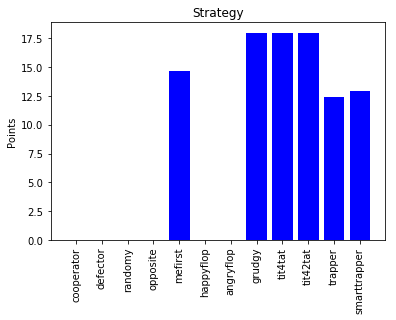

New round!
Round 9 with the current strategies: ['smarttrapper', 'mefirst', 'tit4tat', 'grudgy', 'grudgy', 'grudgy', 'grudgy', 'grudgy', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat']
Strat: smarttrapper   	Avg pts: 12.98
Strat: mefirst   	Avg pts: 14.95
Strat: tit4tat   	Avg pts: 18.70
Strat: grudgy   	Avg pts: 18.70
Strat: grudgy   	Avg pts: 18.70
Strat: grudgy   	Avg pts: 18.70
Strat: grudgy   	Avg pts: 18.70
Strat: grudgy   	Avg pts: 18.70
Strat: tit42tat   	Avg pts: 18.70
Strat: tit42tat   	Avg pts: 18.70
Strat: tit42tat   	Avg pts: 18.70
Strat: tit42tat   	Avg pts: 18.70


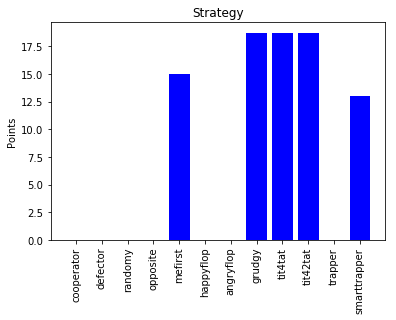

New round!
Round 10 with the current strategies: ['mefirst', 'grudgy', 'grudgy', 'grudgy', 'grudgy', 'grudgy', 'tit4tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat']
Strat: mefirst   	Avg pts: 15.50
Strat: grudgy   	Avg pts: 19.52
Strat: grudgy   	Avg pts: 19.52
Strat: grudgy   	Avg pts: 19.52
Strat: grudgy   	Avg pts: 19.52
Strat: grudgy   	Avg pts: 19.52
Strat: tit4tat   	Avg pts: 19.52
Strat: tit42tat   	Avg pts: 19.52
Strat: tit42tat   	Avg pts: 19.52
Strat: tit42tat   	Avg pts: 19.52
Strat: tit42tat   	Avg pts: 19.52
Strat: tit42tat   	Avg pts: 19.52


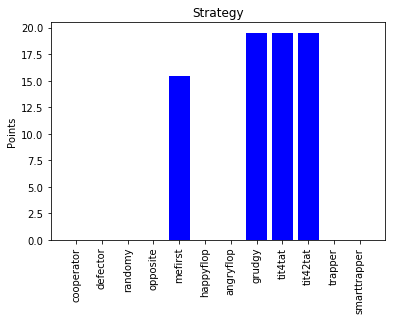

New round!
Round 11 with the current strategies: ['grudgy', 'grudgy', 'grudgy', 'grudgy', 'grudgy', 'tit4tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat']
Strat: grudgy   	Avg pts: 20.00
Strat: grudgy   	Avg pts: 20.00
Strat: grudgy   	Avg pts: 20.00
Strat: grudgy   	Avg pts: 20.00
Strat: grudgy   	Avg pts: 20.00
Strat: tit4tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00


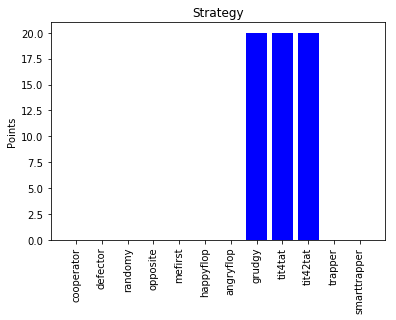

New round!
Round 12 with the current strategies: ['grudgy', 'grudgy', 'grudgy', 'grudgy', 'tit4tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat']
Strat: grudgy   	Avg pts: 20.00
Strat: grudgy   	Avg pts: 20.00
Strat: grudgy   	Avg pts: 20.00
Strat: grudgy   	Avg pts: 20.00
Strat: tit4tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00


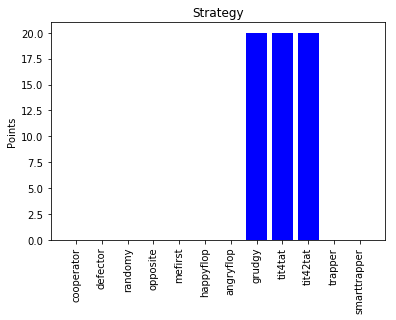

New round!
Round 13 with the current strategies: ['grudgy', 'grudgy', 'grudgy', 'grudgy', 'tit4tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat']
Strat: grudgy   	Avg pts: 20.00
Strat: grudgy   	Avg pts: 20.00
Strat: grudgy   	Avg pts: 20.00
Strat: grudgy   	Avg pts: 20.00
Strat: tit4tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00


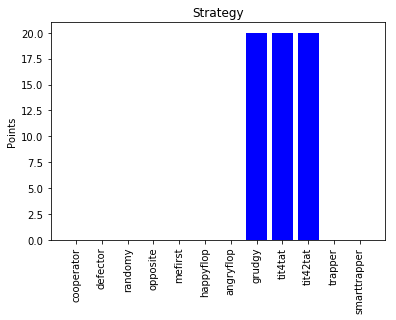

New round!
Round 14 with the current strategies: ['grudgy', 'grudgy', 'grudgy', 'grudgy', 'tit4tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat']
Strat: grudgy   	Avg pts: 20.00
Strat: grudgy   	Avg pts: 20.00
Strat: grudgy   	Avg pts: 20.00
Strat: grudgy   	Avg pts: 20.00
Strat: tit4tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00


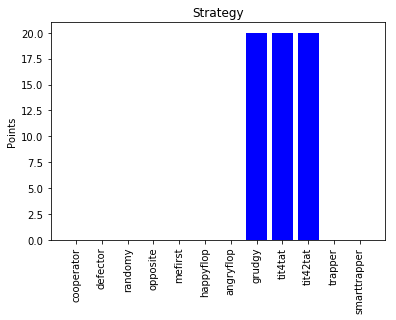

New round!
Round 15 with the current strategies: ['grudgy', 'grudgy', 'grudgy', 'grudgy', 'tit4tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat']
Strat: grudgy   	Avg pts: 20.00
Strat: grudgy   	Avg pts: 20.00
Strat: grudgy   	Avg pts: 20.00
Strat: grudgy   	Avg pts: 20.00
Strat: tit4tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00
Strat: tit42tat   	Avg pts: 20.00


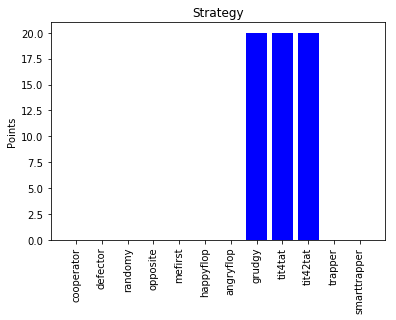

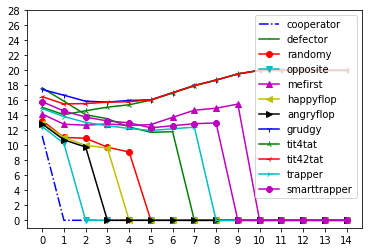

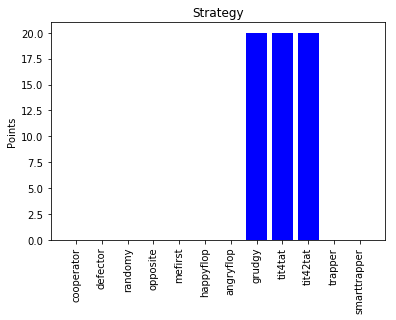

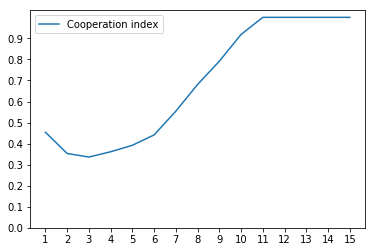

In [43]:
allplayers = []
all_choices_all_games = []

howmanyplays = {"cooperator": 0, "defector": 0, "randomy": 0, "opposite": 0, "mefirst": 0, "happyflop": 0, "angryflop": 0, "grudgy": 0, "tit4tat": 0, "tit42tat": 0, "trapper": 0, "smarttrapper": 0}
scores = {"cooperator": 0, "defector": 0, "randomy": 0, "opposite": 0, "mefirst": 0, "happyflop": 0, "angryflop": 0, "grudgy": 0, "tit4tat": 0, "tit42tat": 0, "trapper": 0, "smarttrapper" : 0}

allplayers_allrounds = [allplayers]
for key in scores:
    allplayers.append(key)

iterations = 15
number_of_rounds = 20
generation_scores = {"cooperator": zeros(iterations), "defector": zeros(iterations), "randomy": zeros(iterations), "opposite": zeros(iterations), "mefirst": zeros(iterations), "happyflop": zeros(iterations), "angryflop": zeros(iterations), "grudgy": zeros(iterations), "tit4tat": zeros(iterations), "tit42tat": zeros(iterations), "trapper": zeros(iterations), "smarttrapper" : zeros(iterations)}
timeline = []

for current_game in range(iterations):
    print("New round!")
    all_choices_all_games.append([])
    print("Round %i with the current strategies: %s" % (current_game+1, allplayers))
    howmanyplays = {"cooperator": 0, "defector": 0, "randomy": 0, "opposite": 0, "mefirst": 0, "happyflop": 0, "angryflop": 0, "grudgy": 0, "tit4tat": 0, "tit42tat": 0, "trapper": 0, "smarttrapper": 0}
    scores = {"cooperator": 0, "defector": 0, "randomy": 0, "opposite": 0, "mefirst": 0, "happyflop": 0, "angryflop": 0, "grudgy": 0, "tit4tat": 0, "tit42tat": 0, "trapper": 0, "smarttrapper" : 0}
    i_all_choices_all_games = []
    for i in range(len(allplayers)-1):
        
        element = allplayers[i]
        n_all_choices_all_games = []
        for n in range((i+1), (len(allplayers)),1):
            
            if printORnot == True:
                print("%s VS %s" % (element.capitalize(), allplayers[n].capitalize()))
            
            # Attempting to excise these to place them in the corret place
            #howmanyplays[element] +=1
            #howmanyplays[allplayers[n]] += 1
            x_all_choices_all_games = []
            for x in range(2):

                if x == 0:
                    name1 = element
                    name2 = allplayers[n]
                    #print("player 1 is now %s" % name1)
                    #print("player 2 is now %s \n" % name2)
                elif x == 1:
                    name1 = allplayers[n]
                    name2 = element
                    #print("player 1 is now %s" % name1)
                    #print("player 2 is now %s \n" % name2)

                name1 = name1.lower()
                name2 = name2.lower()

                if name1 not in scores or name2 not in scores:
                    sys.exit("Unrecognized players %s, %s check scores dictionary for names." % (name1, name2))

                player1 = Player(name1)
                player2 = Player(name2)

                all_choices = [[],[]]

                player1_prev_choice = None
                player2_prev_choice = None
                player1_total = 0
                player2_total = 0

                j_all_choices_all_games = []
                for j in range(number_of_rounds):
                    player1_miscomm = rnd.randint(0,99)
                    player2_miscomm = rnd.randint(0,99)
                    player1_send = player1.Play(all_choices, 0, j)
                    player2_send = player2.Play(all_choices, 1, j)

                    if player1_send == 3:
                        print("Player 1 reported an error")
                        continue
                    if player2_send == 3:
                        print("Player 2 reported an error")
                        continue
                    
                    if player1_miscomm < randomness:
                        if player1_send == 1:
                            player1_send = 0
                        elif player1_send == 0:
                            player1_send = 1
                    
                    if player2_miscomm < randomness:
                        if player2_send == 1:
                            player2_send = 0
                        elif player2_send == 0:
                            player2_send = 1

                    player1_rec, player2_rec = Payoff(player1_send, player2_send)

                    all_choices[0].append(player1_send)
                    all_choices[1].append(player2_send)

                    #print("Giving %i points to player 1: %s" % (player1_rec, name1))
                    player1_total += player1_rec
                    #print("Giving %i points to player 2: %s" % (player2_rec, name2))
                    player2_total += player2_rec

                    scores[name1] += player1_rec
                    scores[name2] += player2_rec
                    
                j_all_choices_all_games.extend(all_choices[0])
                j_all_choices_all_games.extend(all_choices[1])
                #print(j_all_choices_all_games)
            
                howmanyplays[element] +=1
                howmanyplays[allplayers[n]] += 1
            
                x_all_choices_all_games.extend(j_all_choices_all_games)
                #print("x: %i" % len(x_all_choices_all_games))
            n_all_choices_all_games.extend(x_all_choices_all_games)
            #print("n: %i" % len(n_all_choices_all_games))
        i_all_choices_all_games.extend(n_all_choices_all_games)
        #print("i: %i" % len(i_all_choices_all_games))
    all_choices_all_games[current_game].extend(i_all_choices_all_games)
    #print("all: %i" % len(all_choices_all_games))
        
    #print("i is %i \n" % i)
    #print("Number of games played for each player: %s \n" % howmanyplays)

    for key in scores:
        if howmanyplays[key] == 0:
            continue
        scores[key] = (scores[key]/((howmanyplays[key])*number_of_rounds))
        generation_scores[key][current_game] = round(scores[key], 2)

    #print("Total scores %s " % scores)
    for name in allplayers:
        print("Strat: {}   \tAvg pts: {:.2f}".format(name, scores[name]))
    
    allplayers = Elimination(scores, howmanyplays, allplayers)
    #print(allplayers)
    
    
    allplayers_allrounds.append(allplayers)
    timeline.append(current_game)
    BarPlotter(scores)

GamePrinter(timeline, generation_scores, allplayers_allrounds)
Indexer(all_choices_all_games)
#print(all_choices_all_games)

In [ ]:
print(generation_scores)

In [ ]:
for name in allplayers:
    print("Strat: {}   \tAvg pts: {:.2f}".format(name, scores[name]))

In [ ]:
sorted_d = sorted(scores.items(), key=operator.itemgetter(1))
print(sorted_d)

In [ ]:
p_generation = []
print(allplayers)
for element in sorted_d:
    if howmanyplays[element[0]] == 0:
        continue
    else:
        print(element[1])
        for i in range(allplayers.count(element[0])):
            p_generation.append(element[0])
        
p_size = len(p_generation)
allplayers = list(p_generation[2:])
allplayers.extend(p_generation[-2:])
print(allplayers)


In [ ]:
p_generation

In [ ]:
next_generation = []
next_generation = list(p_generation[2:])
print(next_generation)
next_generation.extend(p_generation[-2:])
print(next_generation)

In [ ]:
%whos

In [ ]:
dir(Player)

In [ ]:
help(round)

In [ ]:
0 % 2

In [ ]:
#allplayers = ["cooperator", "defector", "randomy", "opposite", "mefirst", "happyflop", "angryflop", "grudgy", "tit4tat"]
#allplayers = ["defector", "tit4tat", "grudgy", "tit42tat", "tit4tat", "trapper", "smarttrapper"]
allplayers = []

howmanyplays = {"cooperator": 0, "defector": 0, "randomy": 0, "opposite": 0, "mefirst": 0, "happyflop": 0, "angryflop": 0, "grudgy": 0, "tit4tat": 0, "tit42tat": 0, "trapper": 0, "smarttrapper": 0}
scores = {"cooperator": 0, "defector": 0, "randomy": 0, "opposite": 0, "mefirst": 0, "happyflop": 0, "angryflop": 0, "grudgy": 0, "tit4tat": 0, "tit42tat": 0, "trapper": 0, "smarttrapper" : 0}

allplayers_allrounds = [allplayers]
for key in scores:
    allplayers.append(key)
print(allplayers)

In [41]:
print(sum(all_choices_all_games[14]))
print(len(all_choices_all_games[14]))

0
5280


### Conditions: ###

* The code must be written as a function
* The function must match the provided prototype, accepting the exact arguments given
* The function must handle both starting as player 1 and as player 2 and subsequent play
* No global variables are allowed
* The function must return the integer 0 or 1, and nothing else
* Your code must be able to play against the various strategies specified in the problem set without causing the program to crash. This is an essential precondition for the final experiment.
 
Prototype:
def func(previous_games, player_number, round):
    # some code handling the input and deciding on output
      'previous_games' is a nested list of all previous choices in the same round of games
      previous_games[0][i] is the choice of player 1 in game i, whereas
      previous_games[1][i] is the choice of player 2 in game i
      player_number is an integer 0 or 1 telling the function whether it plays as 
      player 1 or player 2, respectively
      The 'round' variable starts at 0 and tells the function which round is currently being played.
      
    return my_decision
    
